<a href="https://www.kaggle.com/code/pratyushingale14/time-series-analysis-stock-market-case-study?scriptVersionId=104680198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install plotly

In [3]:
company_list=["AAPL_data.csv", "GOOG_data.csv", "MSFT_data.csv","AMZN_data.csv" ]

In [4]:
all_data= pd.DataFrame()

In [5]:
path="../input/stock-price-edatime-series-analysis/individual_stocks_5yr"
for file in company_list:
    current_df=pd.read_csv("../input/stock-price-edatime-series-analysis/individual_stocks_5yr"+"/"+file)
    all_data=pd.concat([all_data, current_df])

In [6]:
all_data.head(11)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [7]:
all_data.shape

(4752, 7)

***ANALYSE CLOSING PRICE OF ALL THE STOCKS***

In [8]:
Tech_list=all_data["Name"].unique()

In [9]:
Tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

In [10]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [11]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [12]:
all_data["date"]= pd.to_datetime(all_data["date"])

In [13]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

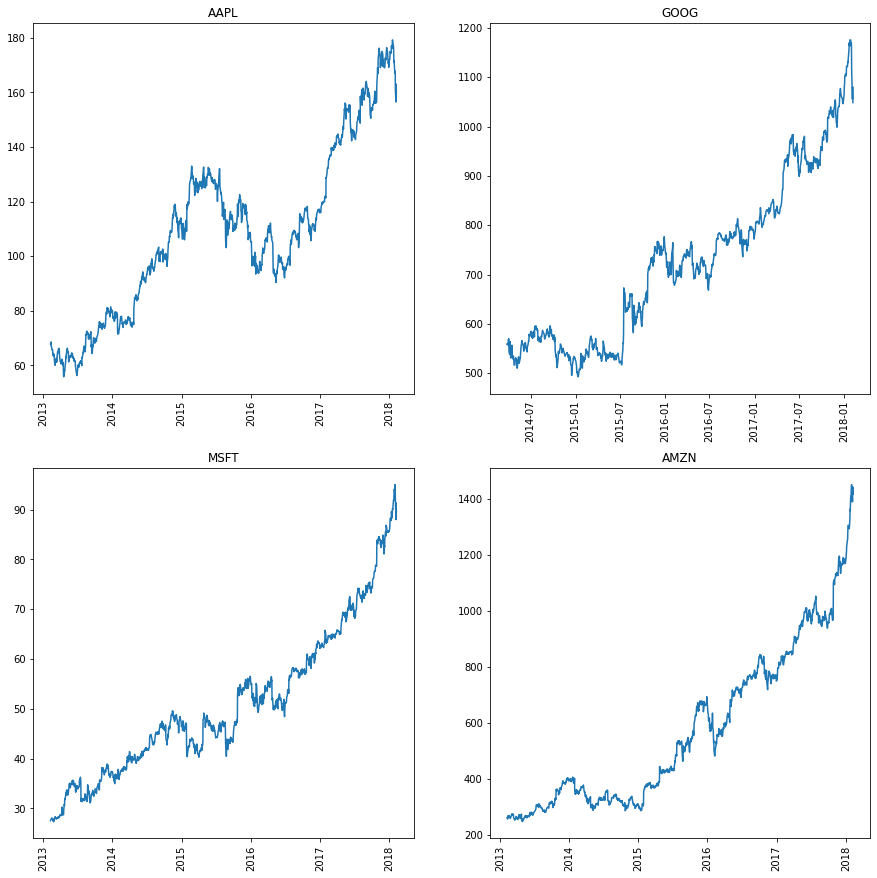

In [14]:
plt.figure(figsize=(15,15))
for i, company in enumerate(Tech_list,1):
    plt.subplot(2,2,i)
    plt.title(company)
    df=all_data[all_data["Name"]== company]
    plt.plot(df["date"], df["close"])
    plt.xticks(rotation="vertical")

***TOTAL VOLUME OF STOCKS BEING TRADED EACH DAY***

In [15]:
import plotly.express as px

In [16]:
for comapny in Tech_list:
    df= all_data[all_data["Name"]== company]
    plot=px.line(df,x="date",y= "volume",title=comapny)
    plot.show()

***DAILY PRICE CHANGE IN STOCK***

In [17]:
df=pd.read_csv(path+"/"+"AAPL_data.csv")

In [18]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [19]:
df["Daily price change"]= df["close"]-df["open"]

In [20]:
df.head()

,date,open,high,low,close,volume,Name,Daily price change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [21]:
df["% daily price change"]= ((df["Daily price change"])/df["close"])*100

In [22]:
df.head()

,date,open,high,low,close,volume,Name,Daily price change,% daily price change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [23]:
df.reset_index(inplace= True)

In [24]:
df.head()


,index,date,open,high,low,close,volume,Name,Daily price change,% daily price change
0,0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [25]:
plot=px.line(df, x="date", y="% daily price change", title= "AAPL")
plot.show()

***Analyse Monthly Mean of Close feature***

***Analyse Monthly Mean of Close feature***

In [26]:
data1=df.copy()

In [27]:
data1.head()

,index,date,open,high,low,close,volume,Name,Daily price change,% daily price change
0,0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [28]:
data1.dtypes

index                     int64
date                     object
open                    float64
high                    float64
low                     float64
close                   float64
volume                    int64
Name                     object
Daily price change      float64
% daily price change    float64
dtype: object

In [29]:
data1["date"]=pd.to_datetime(data1['date'])

In [30]:
data1.set_index('date',inplace= True)

In [31]:
data1.head(10)

,index,open,high,low,close,volume,Name,Daily price change,% daily price change
date,,,,,,,,,
2013-02-08,0,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,1,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,2,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,3,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,4,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624
2013-02-15,5,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.2414,-1.888431
2013-02-19,6,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.1586,-0.241353
2013-02-20,7,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,-1.2628,-1.969389
2013-02-21,8,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,0.0086,0.013496


In [32]:
data1["2013-02-08":"2013-02-19"]

,index,open,high,low,close,volume,Name,Daily price change,% daily price change
date,,,,,,,,,
2013-02-08,0,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,1,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,2,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,3,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,4,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624
2013-02-15,5,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.2414,-1.888431
2013-02-19,6,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.1586,-0.241353


(array([528, 540, 552, 564, 576]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

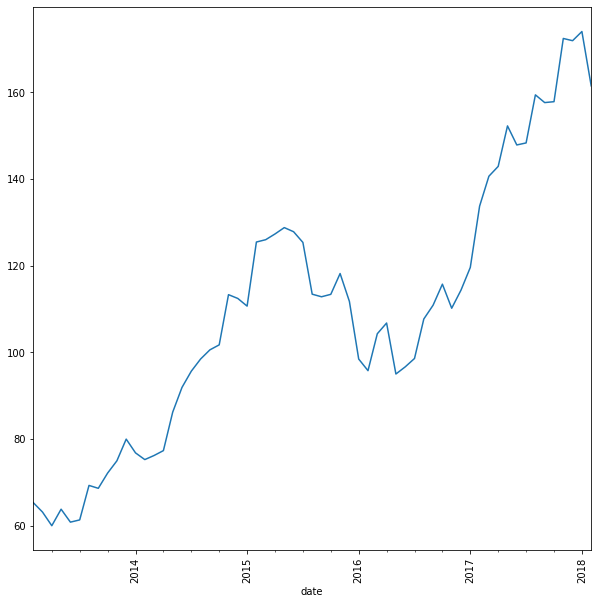

In [33]:
plt.figure(figsize=(10,10))
data1['close'].resample("M").mean().plot(kind="line")
plt.xticks(rotation="vertical")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2013-12-31 00:00:00'),
  Text(1, 0, '2014-12-31 00:00:00'),
  Text(2, 0, '2015-12-31 00:00:00'),
  Text(3, 0, '2016-12-31 00:00:00'),
  Text(4, 0, '2017-12-31 00:00:00'),
  Text(5, 0, '2018-12-31 00:00:00')])

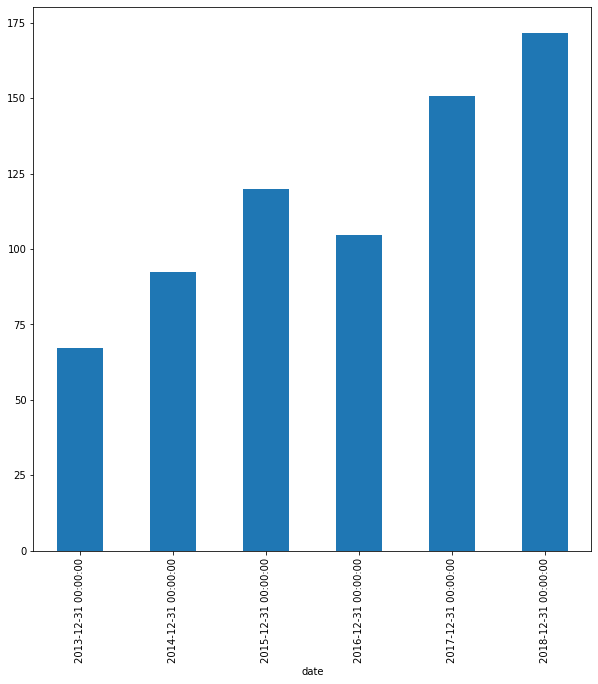

In [34]:
plt.figure(figsize=(10,10))
data1['close'].resample("Y").mean().plot(kind="bar")
plt.xticks(rotation="vertical")

***Whether Stock Price of Tech companies are correlated***

In [35]:
aapl= pd.read_csv("../input/stock-price-edatime-series-analysis/individual_stocks_5yr/AAPL_data.csv")
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [36]:
amzn=pd.read_csv("../input/stock-price-edatime-series-analysis/individual_stocks_5yr/AMZN_data.csv")
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [37]:
msft=pd.read_csv("../input/stock-price-edatime-series-analysis/individual_stocks_5yr/MSFT_data.csv")
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [38]:
goog=pd.read_csv("../input/stock-price-edatime-series-analysis/individual_stocks_5yr/GOOG_data.csv")
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [39]:
close=pd.DataFrame()

In [40]:
close["goog"]= goog["close"]
close["amzn"]= amzn["close"]
close["msft"]= msft["close"]
close["aapl"]= aapl["close"]

In [41]:
close.head()

,goog,amzn,msft,aapl
0,558.46,261.95,27.55,67.8542
1,559.99,257.21,27.86,68.5614
2,556.97,258.70,27.88,66.8428
3,567.16,269.47,28.03,66.7156
4,567.00,269.24,28.04,66.6556


In [42]:
import seaborn as sns

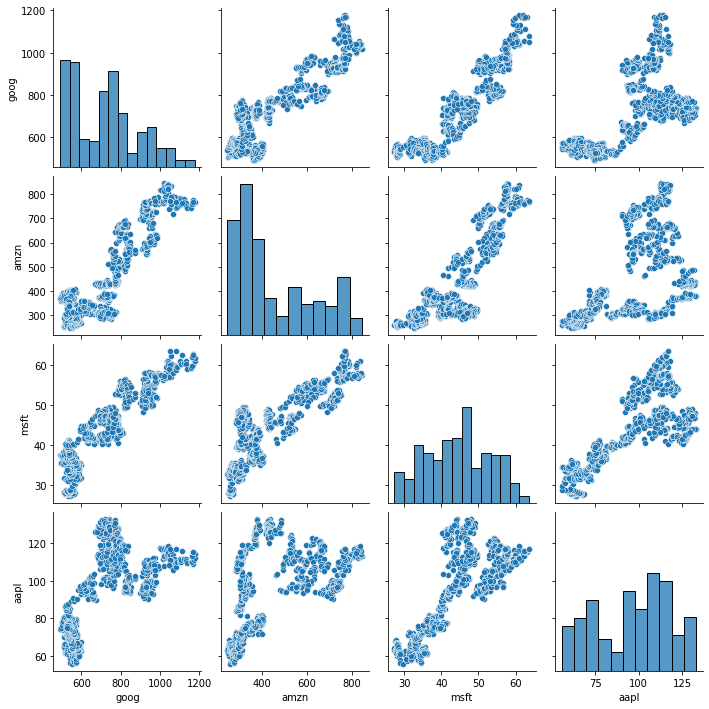

In [43]:
sns.pairplot(data=close)

<AxesSubplot:>

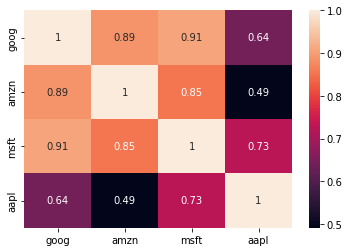

In [44]:
sns.heatmap(close.corr(),annot= True)

***Daily Return of each Stock and how the are Correlated***

In [45]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [46]:
data= pd.DataFrame()

In [47]:
data["aapl change"]= ((aapl['close']-aapl['open'])/aapl['close'])*100
data["msft change"]= ((msft['close']-msft['open'])/msft['close'])*100
data["goog change"]= ((goog['close']-goog['open'])/goog['close'])*100
data["amzn change"]= ((amzn['close']-amzn['open'])/amzn['close'])*100

In [48]:
data.head()

,aapl change,msft change,goog change,amzn change
0,0.206325,0.725953,-1.708269,0.209964
1,0.714688,0.753769,-0.216075,-2.328836
2,-2.481344,0.000000,-1.781065,-0.189409
3,-0.042869,0.356761,1.489879,2.946525
4,0.443624,0.427960,0.334039,0.694548


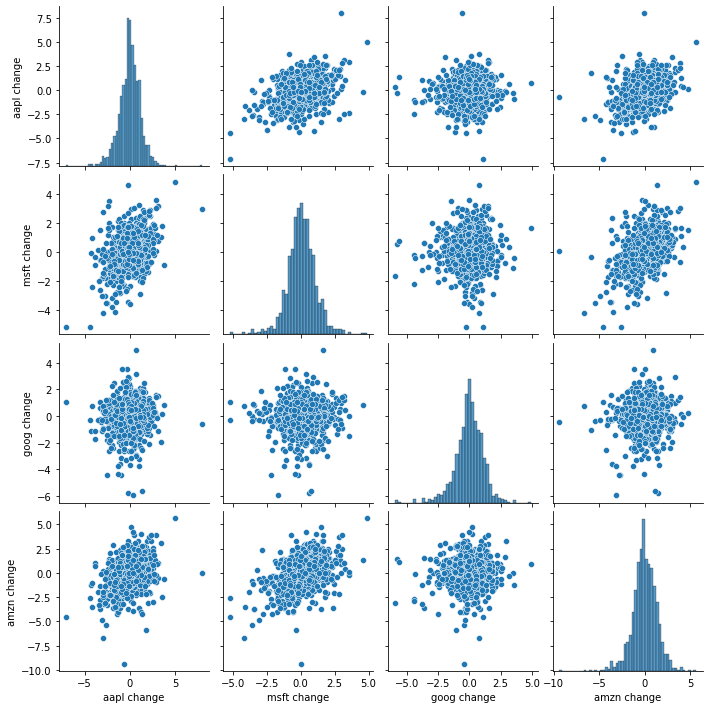

In [49]:
sns.pairplot(data)

<AxesSubplot:>

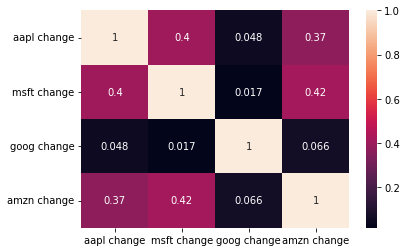

In [50]:
sns.heatmap(data.corr(), annot= True)

***Value at Risk Analysis***

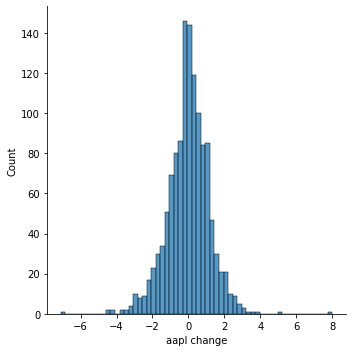

In [51]:
sns.displot(data["aapl change"])

In [52]:
data["aapl change"].std()

1.1871377131421237

In [53]:
data["aapl change"].std()*2

2.3742754262842474

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
msft change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
goog change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
